In [1]:
#defining the function
def star_classification(wl, f):
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy import interpolate
    from scipy import optimize as opt
    from scipy.optimize import curve_fit

    def classify_planck(wavelength, flux):
        chunk = len(wavelength)//200
        flux_chunks = [flux[x:x+chunk] for x in range(0, len(flux), chunk)]
        wl_chunks = [wavelength[x:x+chunk] for x in range(0, len(wavelength), chunk)]

        new_flux = []
        new_wl = []

        for i in range(len(flux_chunks)):
            new_flux.append(np.mean(flux_chunks[i]))
            new_wl.append(np.mean(wl_chunks[i]))

        def blackbody_lam(lam, T, mult_c):
            lam = 1e-10*(lam)
            h = 6.626e-34 #m^2 kg/s
            c = 2.997925e+8 #m/s
            k = 1.381e-23 #(kg m^2)/(K s^2)
            intensity = (2*h*c**2) / (lam**5 * (np.exp(h*c / (lam*k*T)) - 1)) #intensity in kg/m/s^3
            return mult_c*intensity*(10**-12)
        pars, cov = curve_fit(blackbody_lam, new_wl,new_flux, p0 = [1000,200])
        error = np.sqrt(cov[0][0])
        if 2500<=pars[0]<3500:
            a = 'Temperature= %.3f +/- %.3f K \n Spectral Type = M \n Color = Red \n Spectral Features =  Strong titanium oxide and some calcium'% (pars[0],error)
        elif 3500<=pars[0]<5000:
            a = 'Temperature= %.3f +/- %.3f K \n Spectral Type = K \n Color = Yellow-Orange \n Spectral Features = Mostly neutral metals'% (pars[0],error)
        elif 5000<=pars[0]<6000:
            a = 'Temperature= %.3f +/- %.3f K \n Spectral Type = G \n Color = Yellow \n Spectral Features = Both metals and ionized metals, especially ionized calcium'% (pars[0],error)
        elif 6000<=pars[0]<7500:
            a = 'Temperature= %.3f +/- %.3f K \n Spectral Type = F \n Color = Yellow-White \n Spectral Features = Hydrogen and ionized metals such as calcium and iron'% (pars[0],error)    
        elif 7500<=pars[0]<10000:
            a = 'Temperature= %.3f +/- %.3f K \n Spectral Type = A \n Color = White \n Spectral Features = Strong hydrogen, some ionized metals'% (pars[0],error)
        elif 10000<=pars[0]<30000:
            a = 'Temperature= %.3f +/- %.3f K \n Spectral Type = B \n Color = Blue-White \n Spectral Features = Helium, some hydrogen'% (pars[0],error)
        elif 30000<=pars[0]<60000:
            a = 'Temperature= %.3f +/- %.3f K \n Spectral Type = O \n Color = Yellow-Orange \n Spectral Features = Ionized helium'% (pars[0],error)
        else:
            a = 'Are you sure this is a star on the main sequence?'
        print('Approximation using Planck Equation')
        print(a)
        fitted_y = []
        for i in new_wl:
            fitted_y.append(blackbody_lam(i,pars[0], pars[1]))
        plt.figure()
        plt.scatter(new_wl, new_flux, s=2, label='Binned Data')
        plt.plot(new_wl, fitted_y, 'red', label = 'Fitted Blackbody Curve')
        plt.xlabel('Wavelength (Angstroms)')
        plt.ylabel('Flux ($10^-17 erg/cm^2/s/Angstrom$)')
        plt.title('Flux vs. Wavelength Data with Fitted Blackbody Curve')
        plt.legend()
        plt.show()   
        
    def classify_wien(wavelength, flux):
        chunk = len(wavelength)//200
        flux_chunks = [flux[x:x+chunk] for x in range(0, len(flux), chunk)]
        wl_chunks = [wavelength[x:x+chunk] for x in range(0, len(wavelength), chunk)]

        new_flux = []
        new_wl = []
        for i in range(len(flux_chunks)):
            new_flux.append(np.mean(flux_chunks[i]))
            new_wl.append(np.mean(wl_chunks[i]))

        f1 = interpolate.UnivariateSpline(new_wl, new_flux, k=3)
        temp = np.max(f1(new_wl))
        max_index = np.where(f1(new_wl) == temp)
        max_wl = new_wl[max_index[0][0]]
        star_temp = 2.898*(10**-3)/(max_wl*10**-10)
        if 2500<=star_temp<3500:
            a = 'Temp = %.3f K \n Spectral Type = M \n Color = Red \n Spectral Features =  Strong titanium oxide and some calcium'%star_temp
        elif 3500<=star_temp<5000:
            a = 'Temp = %.3f K \n Spectral Type = K \n Color = Yellow-Orange \n Spectral Features = Mostly neutral metals'%star_temp
        elif 5000<=star_temp<6000:
            a = 'Temp = %.3f K \n Spectral Type = G \n Color = Yellow \n Spectral Features = Both metals and ionized metals, especially ionized calcium'%star_temp
        elif 6000<=star_temp<7500:
            a = 'Temp = %.3f K \nSpectral Type = F \nColor = Yellow-White \nSpectral Features = Hydrogen and ionized\n metals such as calcium and iron'%star_temp
        elif 7500<=star_temp<10000:
            a = 'Temp = %.3f K \n Spectral Type = A \n Color = White \n Spectral Features = Strong hydrogen, some ionized metals'%star_temp
        elif 10000<=star_temp<30000:
            a = 'Temp = %.3f K \n Spectral Type = B \n Color = Blue-White \n Spectral Features = Helium, some hydrogen'%star_temp
        elif 30000<=star_temp<60000:
            a = 'Temp = %.3f K \n Spectral Type = O \n Color = Yellow-Orange \n Spectral Features = Ionized helium'%star_temp
        else:
            a = 'Are you sure this is a star on the main sequence?'
        print('Approximation using Wiens Law')
        print(a)
    classify_planck(wl,f)
    classify_wien(wl,f)

Approximation using Planck Equation
Temperature= 6270.345 +/- 30.976 K 
 Spectral Type = F 
 Color = Yellow-White 
 Spectral Features = Hydrogen and ionized metals such as calcium and iron


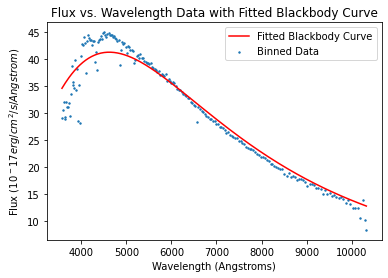

Approximation using Wiens Law
Temp = 6395.844 K 
Spectral Type = F 
Color = Yellow-White 
Spectral Features = Hydrogen and ionized
 metals such as calcium and iron


In [2]:
#testing the funciton using blackbody spectrum of star
#in this case, we assume that the data set has already accounted for redshift
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
#getting data
image_file = get_pkg_data_filename('spec-3586-55181-0004.fits')
image_data = fits.getdata(image_file, ext=1)
flux = []
log_wl = []
wl = []
for i in range(image_data.shape[0]):
    flux.append(image_data[i][0])
    log_wl.append(image_data[i][1])
    wl.append(10**(image_data[i][1]))
#test function
star_classification(wl, flux)

### Why are two different approximations given? We tested both functions on 40 different stellar spectra and found the following results.

In [3]:
#creating function to quantitavely compare both functions
def compare_func(x):
    from astropy.utils.data import get_pkg_data_filename
    from astropy.io import fits
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy import interpolate
    from scipy.optimize import curve_fit

    temp_diff = []
    percent_diff = []
    for i in x:
        image_file = get_pkg_data_filename(i)
        image_data = fits.getdata(image_file, ext=1)
        flux = []
        log_wl = []
        wl = []
        for i in range(image_data.shape[0]):
            flux.append(image_data[i][0])
            log_wl.append(image_data[i][1])
            wl.append(10**(image_data[i][1]))
        chunk = len(wl)//200
        flux_chunks = [flux[x:x+chunk] for x in range(0, len(flux), chunk)]
        wl_chunks = [wl[x:x+chunk] for x in range(0, len(wl), chunk)]

        new_flux = []
        new_wl = []

        for i in range(len(flux_chunks)):
            new_flux.append(np.mean(flux_chunks[i]))
            new_wl.append(np.mean(wl_chunks[i]))

        #code for curve fit function
        def blackbody_lam(lam, T, mult_c):
            lam = 1e-10*(lam)
            h = 6.626e-34 #m^2 kg/s
            c = 2.997925e+8 #m/s
            k = 1.381e-23 #(kg m^2)/(K s^2)
            intensity = (2*h*c**2) / (lam**5 * (np.exp(h*c / (lam*k*T)) - 1)) #intensity in kg/m/s^3
            return mult_c*intensity*(10**-12)
        pars, cov = curve_fit(blackbody_lam, new_wl,new_flux, p0 = [1000,200])
        
        #code for wien function
        f1 = interpolate.UnivariateSpline(new_wl, new_flux, k=3)
        temp = np.max(f1(new_wl))
        max_index = np.where(f1(new_wl) == temp)
        max_wl = new_wl[max_index[0][0]]
        star_temp = 2.898*(10**-3)/(max_wl*10**-10)
        
        temp_diff.append(pars[0]-star_temp)
        percent_diff.append((pars[0]-star_temp)*100/pars[0])
    plt.hist(percent_diff, 8)
    plt.xlabel('Percent Difference')
    plt.ylabel('Frequency')
    print(np.histogram(percent_diff,6,(-15,15)))

(array([ 8,  7, 12,  5,  2,  2]), array([-15., -10.,  -5.,   0.,   5.,  10.,  15.]))


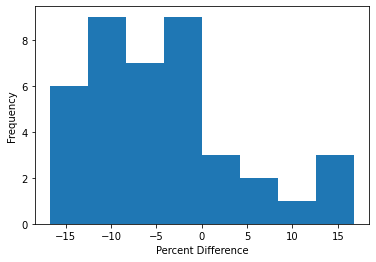

In [4]:
#using function above on 40 stellar blackbody spectra
data_list = ['spec-3586-55181-0004.fits','spec-11677-58510-0404.fits','spec-1650-53174-0037.fits','spec-1650-53174-0215.fits','spec-0266-51602-0028.fits','spec-0272-51941-0043.fits','spec-0266-51602-0365.fits', 'spec-0266-51602-0014.fits','spec-11704-58514-0971.fits','spec-0266-51630-0130.fits','spec-0266-51630-0056.fits','spec-1283-52762-0414.fits','spec-1283-52762-0397.fits','spec-1283-52762-0378.fits','spec-1283-52762-0377.fits','spec-1283-52762-0365.fits','spec-1283-52762-0360.fits','spec-0419-51812-0236.fits','spec-0419-51812-0051.fits','spec-0419-51812-0036.fits','spec-0419-51812-0028.fits','spec-0419-51812-0017.fits','spec-0419-51812-0333.fits','spec-0419-51812-0314.fits','spec-0419-51812-0297.fits','spec-0419-51868-0381.fits','spec-0419-51868-0377.fits','spec-0419-51868-0358.fits','spec-0419-51868-0333.fits','spec-2224-53815-0082.fits','spec-2224-53815-0060.fits','spec-1032-53175-0262.fits','spec-1032-53175-0252.fits','spec-1032-53175-0215.fits','spec-1032-53175-0208.fits','spec-1032-53175-0181.fits','spec-1032-53175-0180.fits','spec-1032-53175-0146.fits','spec-1032-53175-0305.fits','spec-1032-53175-0265.fits']
compare_func(data_list)

Since we were unable to compare to a true value for temperature, the histogram above shows the percent difference between the two approximations in temperature using the equation 
(Planck estimation-Wien estimation)*100/(Planck estimation)
We see (using np.histogram) that 
- 42.5% of the time, the estimations were about within a 5% difference
- 65% of the time, the estimations were within a 10% difference
- 90% of the time, the estimations were within a 15% difference

While this is promising, it also shows that there are clear discrepancies, so it is prudent to include both estimation in the function. This allows one to see the error estimation in the Planck estimation and see a visual representation of the data.